In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

## Test 1 - Calculating ONeill SCSS using a fixed FeFeCuNi ratio

In [2]:
#Liqs=ss.import_data('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx', sheet_name="Python_Input")
Liqs=ss.import_data('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx',
        sheet_name="Python_Input")

We have replaced all missing liquid oxides and strings with zeros. 


In [3]:
Sulf_Sat1=ss.calculate_O2021_SCSS(df=Liqs, T_K=Liqs['T_K'], P_kbar=Liqs['P_kbar'], 
                            Fe_FeNiCu_Sulf=Liqs['Fe_FeNiCu_Sulf'], Fe3Fet_Liq=1-Liqs['Fe2FeT_Liq'])

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


Text(0, 0.5, 'Discprenecy (Python - Excel, ppm)')

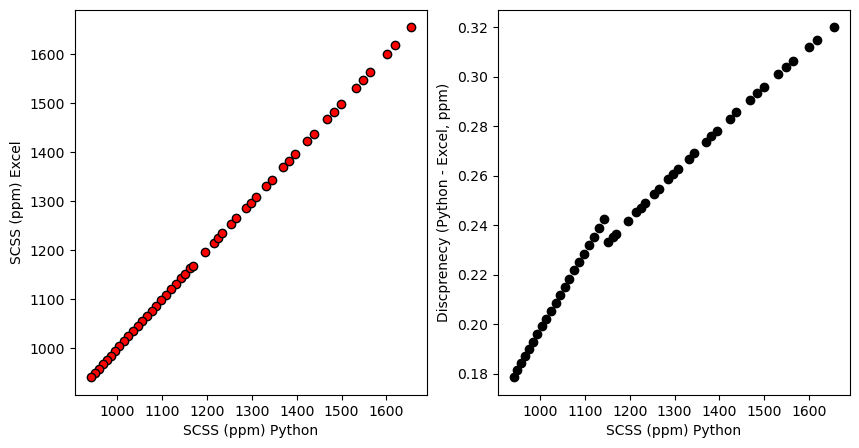

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Sulf_Sat1['SCSS2_ppm'], Liqs['SCSS_Calc'], 'ok', mfc='red')
ax1.set_xlabel('SCSS (ppm) Python')
ax1.set_ylabel('SCSS (ppm) Excel')

ax2.plot(Sulf_Sat1['SCSS2_ppm'], Sulf_Sat1['SCSS2_ppm']-Liqs['SCSS_Calc'], 'ok')
ax2.set_xlabel('SCSS (ppm) Python')
ax2.set_ylabel('Discprenecy (Python - Excel, ppm)')

## Test 2 - Calculating using the full O'Neill set up (O'Neill Fe3, and sulfide composition)

In [5]:
Liqs2=ss.import_data('Clean_Oneill_SCSSCalc_July2020_Calc_Sulf.xlsx', sheet_name="Python_Input")
Liqs_2=Liqs2.iloc[0:49]

We have replaced all missing liquid oxides and strings with zeros. 


In [6]:
Sulf_Sat2=ss.calculate_O2021_SCSS(df=Liqs2, T_K=Liqs2['T_K'], P_kbar=Liqs2['P_kbar'], 
Ni_Liq=Liqs2['Ni(ppm)'],  Cu_Liq=Liqs2['Cu(ppm)'],
Fe_FeNiCu_Sulf="Calc_ONeill", Fe3Fet_Liq="Calc_ONeill")

Text(0, 0.5, 'Discprenecy (Python - Excel, ppm)')

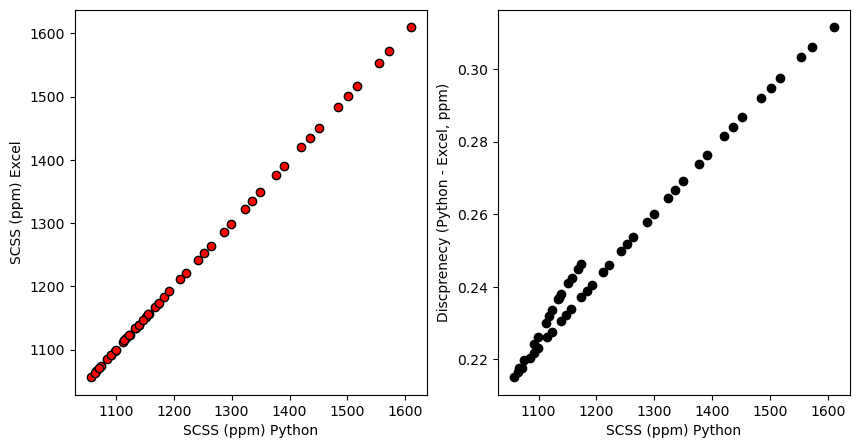

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Sulf_Sat2['SCSS2_ppm'], Liqs_2['SCSS_Calc'], 'ok', mfc='red')
ax1.set_xlabel('SCSS (ppm) Python')
ax1.set_ylabel('SCSS (ppm) Excel')

ax2.plot(Sulf_Sat2['SCSS2_ppm'], Sulf_Sat2['SCSS2_ppm']-Liqs2['SCSS_Calc'], 'ok')
ax2.set_xlabel('SCSS (ppm) Python')
ax2.set_ylabel('Discprenecy (Python - Excel, ppm)')

In [8]:
Sulf_Sat3=ss.calculate_O2021_SCSS(df=Liqs2, T_K=Liqs2['T_K'], 
P_kbar=Liqs2['P_kbar'], 
Ni_Liq=Liqs2['Ni(ppm)'],  Cu_Liq=Liqs2['Cu(ppm)'],
Fe_FeNiCu_Sulf="Calc_ONeill", Fe3Fet_Liq=0.5)
Sulf_Sat3.head()

,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample_ID,Ni(ppm),Cu(ppm),SCSS_Calc,Fe_FeNiCu_Sulf,Fe2FeT_Liq,T_K,P_kbar,Fe_FeNiCu_Sulf_calc
0,1571.264417,7.359636,-3.069301,-0.821966,7.168095,-2.055794,49.8629,0.8165,13.7783,8.234950,0.1633,10.8271,13.6948,1.6942,0.0714,0,0.0,0.5,0.0,0.0,liq1,204.1,91.9,1172.715605,0.607567,0.930773,1550.625,3.2,0.454053
1,1566.109924,7.356350,-3.060618,-0.816116,7.186522,-2.074673,49.8268,0.8220,13.8855,8.284297,0.1649,10.7535,13.6168,1.7097,0.0722,0,0.0,0.5,0.0,0.0,liq2,200.8,92.6,1167.706834,0.610090,0.930283,1547.681,3.2,0.456810
2,1554.254703,7.348751,-3.042926,-0.804985,7.224528,-2.113718,49.7524,0.8332,14.1061,8.384692,0.1683,10.5983,13.4610,1.7415,0.0736,0,0.0,0.5,0.0,0.0,liq3,194.4,94.1,1156.836321,0.614885,0.929200,1541.646,3.2,0.462117
3,1547.739816,7.344551,-3.033917,-0.799573,7.244129,-2.133922,49.7141,0.8390,14.2195,8.435550,0.1701,10.5167,13.3834,1.7579,0.0744,0,0.0,0.5,0.0,0.0,liq4,191.2,94.9,1151.074341,0.617212,0.928603,1538.553,3.2,0.464724
4,1534.010169,7.335641,-3.015692,-0.788948,7.284175,-2.175279,49.6360,0.8508,14.4502,8.538165,0.1737,10.3467,13.2303,1.7914,0.0760,0,0.0,0.5,0.0,0.0,liq5,184.9,96.5,1139.204685,0.621775,0.927306,1532.274,3.2,0.469890
